Introduction
questions to be addressed:
1.	Which genres are most popular from year to year?
2.	Does higher budget mean higher revenue?
3.	Is there a relation between budget and vote_average?
4.	What were the most popular produced genres in 2010 compared to 2015?

In [1]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Wrangling and Cleaning

In [2]:
# import database
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# change scientific to non scientific
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# understand structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# understand size
df.shape

(10866, 21)

In [6]:
# first info
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


In [7]:
# remove films with 0 values related to budget... 
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)
df.dropna(axis=0, inplace=True)
# understand size
df.shape

(1287, 21)

In [8]:
# deal with columns with more info in the same item, I separate them 
df_c = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_k = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_g = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_p = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))
df = df.join([df_c, df_d, df_k, df_g, df_p])
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)

In [9]:
df['original_title'].value_counts().head()

The Fog                 2
Halloween               2
The Three Musketeers    2
Halloween II            2
The Thing               2
Name: original_title, dtype: int64

Exploratory Data Analysis

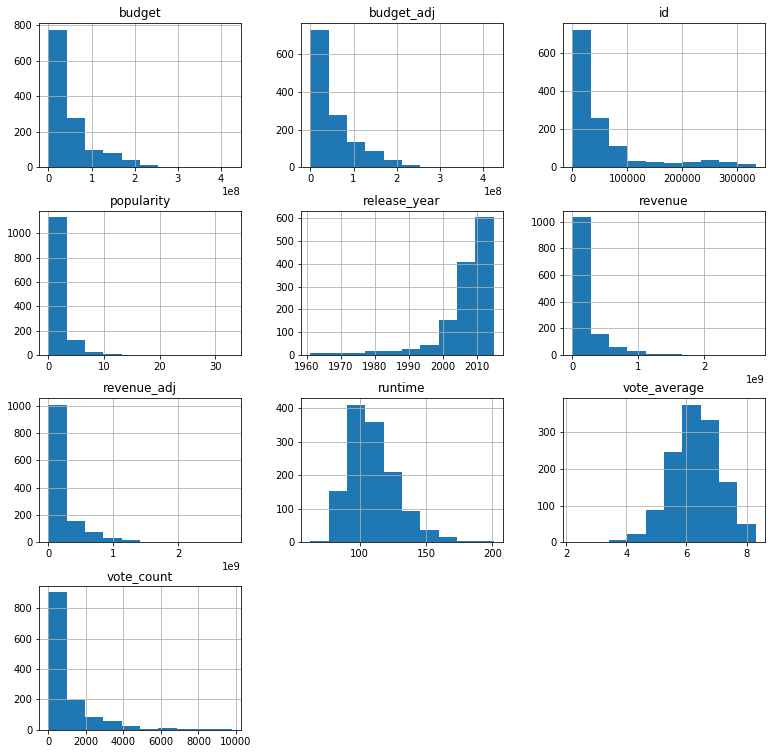

In [10]:
df.hist(figsize=(13,13));

Research Question 1: Which genres are most popular from year to year?

In [11]:
df_genre = df.loc[:, 'genres_1': 'genres_5' ]
df_firstgenre=df.loc[:, 'genres_1' ]
df_year = df.loc[:, 'release_year' ]
df_genre_year=df_genre.join(df_year)
# create year time line
years = df_genre_year['release_year'].unique()
films_intime=[]

In [12]:
for year in years:
    a = df_genre_year[df_genre_year['release_year'] == year]
    b = a.drop(['release_year'], axis = 1)
    c = b.stack().value_counts().idxmax() 
    d = df[df['release_year'] == year]
    e = d.groupby(['genres_1'])['vote_average'].mean().idxmax()
    if c == e:
        z = 'Equal'
    else:
        z = 'Not equal'
    films_intime.append((year,c,e,z))
filmsmostpopular_intime = pd.DataFrame(films_intime, columns=['release_year', 'popular_produced_genre','most_rated_genre','equal?' ]).sort_values('release_year').reset_index().drop(['index'], axis=1)
filmsmostpopular_intime


,release_year,popular_produced_genre,most_rated_genre,equal?
0,1961,Family,Comedy,Not equal
1,1962,Action,Adventure,Not equal
2,1963,Action,Action,Equal
3,1964,Action,Adventure,Not equal
4,1965,Action,Adventure,Not equal
5,1967,Action,Action,Equal
6,1969,Action,Adventure,Not equal
7,1971,Thriller,Action,Not equal
8,1972,Crime,Drama,Not equal
9,1973,Thriller,Drama,Not equal


In [13]:
print(filmsmostpopular_intime['equal?'].value_counts())

Not equal    43
Equal         8
Name: equal?, dtype: int64


Research Question 2: Does higher budget mean higher revenue?

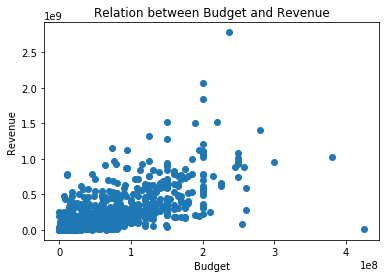

In [16]:
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Relation between Budget and Revenue')
plt.show()

Tendentially, higher budget implies higher revenues.

Research Question 3: Is there a relation between budget and vote_average?

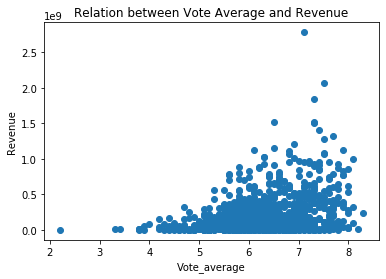

In [17]:
plt.scatter(df['vote_average'], df['revenue'])
plt.xlabel('Vote_average')
plt.ylabel('Revenue')
plt.title('Relation between Vote Average and Revenue')
plt.show()

Tendentially, higher vote implies higher revenues.

Research Question 4: What were the most popular produced genres in 2010 compared to 2015?

In [18]:
# select 2010 from df_genre_year and drop release_year and compute frequency of each genre
df_genre_2010 = df_genre_year[df_genre_year['release_year'] == 2010].copy()
df_genre_2010.drop('release_year',axis=1, inplace=True)
df_genre_2010 = df_genre_2010.stack().value_counts()
df_genre_2015 = df_genre_year[df_genre_year['release_year'] == 2015].copy()
df_genre_2015.drop('release_year',axis=1, inplace=True)
df_genre_2015 = df_genre_2015.stack().value_counts()

In [19]:
#Comparing index of both dataframes
df_genre_2015.index.sort_values(),df_genre_2010.index.sort_values()
df_genre_2010, df_genre_2015

(Drama              63
 Comedy             51
 Action             39
 Thriller           34
 Adventure          26
 Romance            25
 Horror             18
 Crime              16
 Fantasy            15
 Family             15
 Science Fiction    13
 Mystery            12
 Animation          10
 Documentary         4
 Western             3
 History             3
 Foreign             1
 dtype: int64,
 Drama              38
 Thriller           32
 Action             28
 Adventure          27
 Comedy             25
 Science Fiction    22
 Crime              16
 Horror             12
 Fantasy            10
 Romance             9
 Mystery             9
 Family              8
 Animation           7
 Music               3
 Western             2
 History             2
 War                 2
 dtype: int64)

In [20]:
# adjust both in order to have same genres
df_genre_2010['Documentary'] = 0
df_genre_2010['Family'] = 0
df_genre_2010['Fantasy'] = 0
df_genre_2010['Foreign'] = 0
df_genre_2015['Music'] = 0
df_genre_2015['War'] = 0
#Updating DataFrames, sort it by index
df_genre_2015.index.sort_values(),df_genre_2010.index.sort_values()
df_genre_2010, df_genre_2015

(Drama              63
 Comedy             51
 Action             39
 Thriller           34
 Adventure          26
 Romance            25
 Horror             18
 Crime              16
 Fantasy             0
 Family              0
 Science Fiction    13
 Mystery            12
 Animation          10
 Documentary         0
 Western             3
 History             3
 Foreign             0
 dtype: int64,
 Drama              38
 Thriller           32
 Action             28
 Adventure          27
 Comedy             25
 Science Fiction    22
 Crime              16
 Horror             12
 Fantasy            10
 Romance             9
 Mystery             9
 Family              8
 Animation           7
 Music               0
 Western             2
 History             2
 War                 0
 dtype: int64)

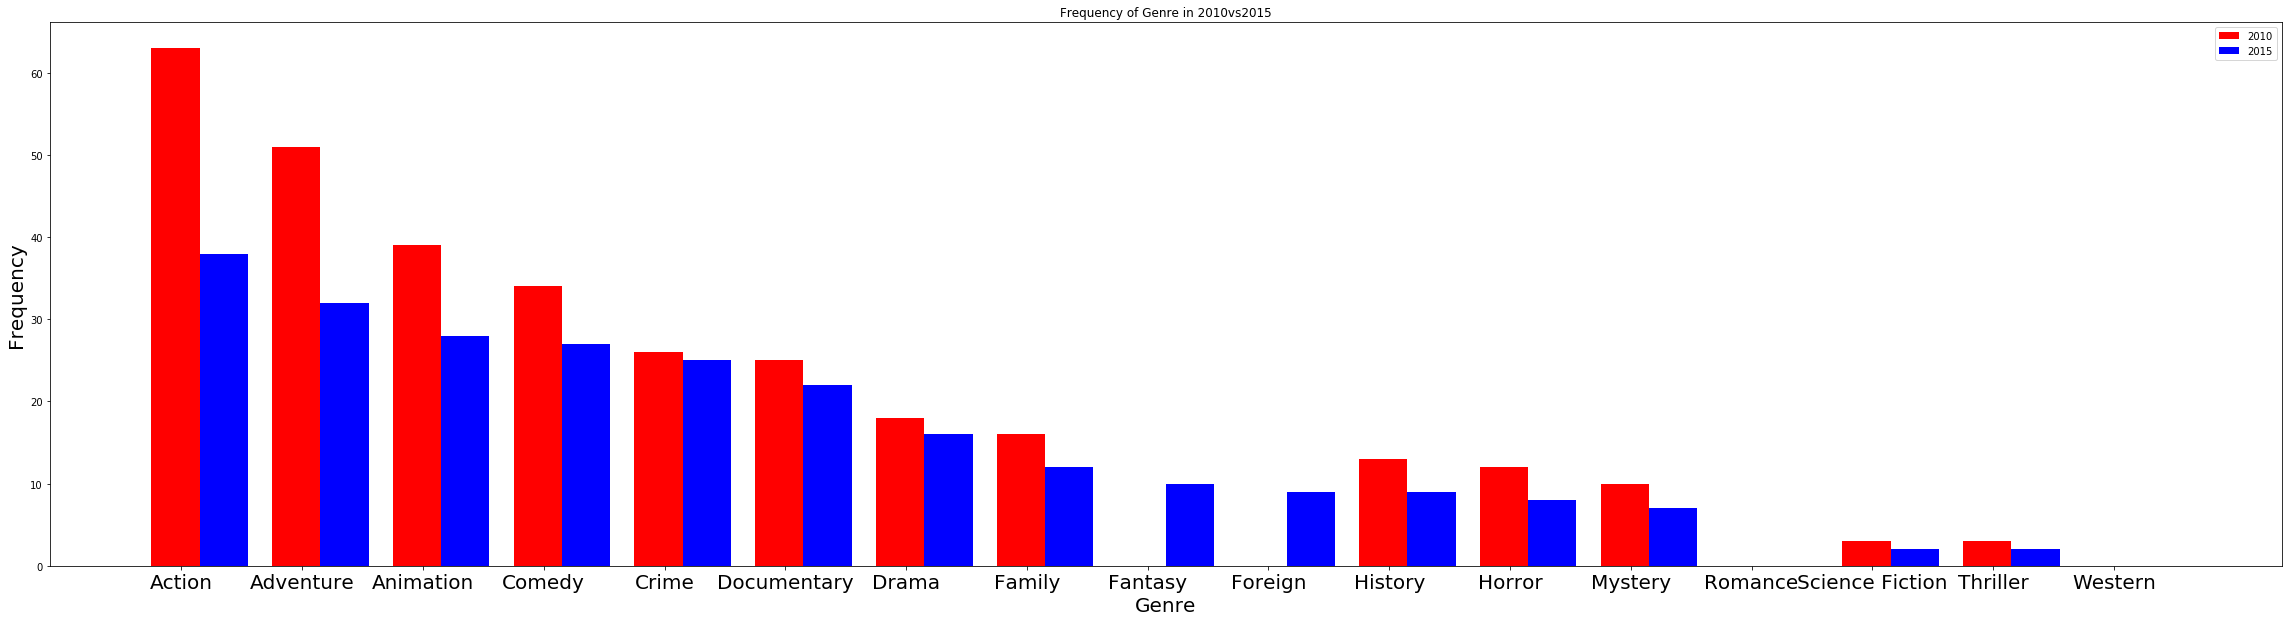

In [30]:
labels = df_genre_2010.index.sort_values()
ind = np.arange(len(df_genre_2010))  # the x locations for the groups
width = 0.4      # the width of the bars
df_genre_2010_bars = plt.bar(ind, df_genre_2010, width, color='r', alpha=1, label='2010')
df_genre_2015_bars = plt.bar(ind + width, df_genre_2015, width, color='b', alpha=1, label='2015')
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Genre',fontsize=20)
plt.title('Frequency of Genre in 2010vs2015')
locations = ind + width/8  # xtick locations
labels = labels # xtick labels
plt.xticks(locations, labels, fontsize=20)
plt.rcParams["figure.figsize"] = (40,10)
# legend
plt.legend();

Conclusions

Considering the most popular and the most voted genres in time, it is evident that the most popular genre differ a lot in time. Moreover, in only 13 cases the most popular genre is also the genre more voted.  In all remaining 38 occasions they differed.

Tendentially, higher budget implies higher revenues.

Tendentially, higher votes are related to higher revenues.

Comparing the most popular generes in 2010 and in 2015, it is possible to notice that in both the years 2010 and 2015 Action and Adventure were the  most frequent produced movies, followed by Animations and Comedy. Moreover, in 2015 much more movies were produced compared to the year 2010. 

Limitations

The columns "budget_adj", "revenue_adj", "budget", "revenue" and "runtime" have also 0 values in some rows. They have been changed into nan and the overall rows are discarded. The duplicated films have been removed and only circa 10% of the overall movies remain. There have also been columns with multiple items for each films (e.g. genere). They have been separated. 